In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail = pd.read_excel('Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
retail.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [4]:
retail.shape
print('The Dataset has ' + str(retail.shape[0]) + ' rows and ' + str(retail.shape[1]) + ' columns')

The Dataset has 541909 rows and 8 columns


Data Definitions: Column names, Data Types, Description of Columns, Counts and Percents of Unique Values, Ranges of Values

In [5]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Checking for missing values in dataset

In [6]:
missing_values = pd.concat([retail.isnull().sum(), 100 * retail.isnull().mean()], axis=1)
missing_values.rename(columns={0: 'Count', 1: 'Percent'}, inplace=True)
missing_values

,Count,Percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


There are 1454 items without a description in the "Description" column in the dataset. This accounts for .27% of the total dataset. There are 135080 rows without a "CustomerID", which is about 25% of the dataset. 

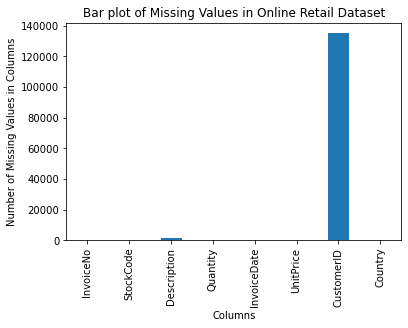

In [7]:
missing_values['Count'].plot(kind='bar')
plt.title('Bar plot of Missing Values in Online Retail Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values in Columns')
plt.show()

In [8]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

CustomerID column is of float64 data type. They should be integers to correctly represent each customer. Also since CustomerID column has null values. These values must removed first before converting the entire column to int64 datatype. 

In [9]:
df = retail.dropna()

In [10]:
df.isna().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [11]:
df.CustomerID = df.CustomerID.astype(int)
assert df.CustomerID.dtype == int

/Users/Jide_1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [12]:
free = df['UnitPrice'] == 0.0
df = df[~free]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
df.groupby('UnitPrice')['Description'].value_counts()

UnitPrice  Description               
0.001      PADS TO MATCH ALL CUSHIONS    3
           Bank Charges                  1
0.010      Discount                      1
0.030      Discount                      1
           Manual                        1
                                        ..
4161.060   Manual                        3
4287.630   Manual                        1
6930.000   Manual                        1
8142.750   POSTAGE                       2
38970.000  Manual                        1
Name: Description, Length: 9164, dtype: int64

In [14]:
df.CustomerID.nunique()

4371

In [15]:
duplicates = df.duplicated('StockCode', keep=False)
df[duplicates].sort_values('CustomerID')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
428990,573511,22725,ALARM CLOCK BAKELIKE CHOCOLATE,8,2011-10-31 12:25:00,3.75,12347,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,2011-08-02 08:48:00,12.75,12347,Iceland
286638,562032,23175,REGENCY MILK JUG PINK,4,2011-08-02 08:48:00,3.25,12347,Iceland
...,...,...,...,...,...,...,...,...
198729,554065,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,2011-05-22 10:39:00,0.42,18287,United Kingdom
198730,554065,20963,APPLE BATH SPONGE,30,2011-05-22 10:39:00,1.25,18287,United Kingdom
198731,554065,20961,STRAWBERRY BATH SPONGE,30,2011-05-22 10:39:00,1.25,18287,United Kingdom
392720,570715,22603,CHRISTMAS RETROSPOT TREE WOOD,24,2011-10-12 10:23:00,0.85,18287,United Kingdom


In [16]:
df[df['StockCode'] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom
...,...,...,...,...,...,...,...,...
479868,C577227,D,Discount,-1,2011-11-18 12:06:00,19.82,14527,United Kingdom
479869,C577227,D,Discount,-1,2011-11-18 12:06:00,16.76,14527,United Kingdom
493613,C578239,D,Discount,-1,2011-11-23 12:29:00,26.33,14912,Italy
516221,C579884,D,Discount,-1,2011-11-30 17:34:00,20.53,14527,United Kingdom


In [17]:
df[df['StockCode'] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom
6798,536981,M,Manual,2,2010-12-03 14:26:00,0.85,14723,United Kingdom
7976,537077,M,Manual,12,2010-12-05 11:59:00,0.42,17062,United Kingdom
8530,537137,M,Manual,36,2010-12-05 12:43:00,0.85,16327,United Kingdom
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841,United Kingdom
533082,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971,United Kingdom
534308,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490,United Kingdom
538321,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521,United Kingdom


In [18]:
one_letter = df['StockCode'].str.len() == 1
df[one_letter]['Description'].value_counts()

Manual      459
Discount     77
Name: Description, dtype: int64

In [19]:
negative = df['Quantity'] <= 0
df = df[~negative]

In [20]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [22]:
df['Quantity'] <= 0

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: Quantity, Length: 397884, dtype: bool

In [23]:
df = df[~one_letter]

<ipython-input-23-09d9061e8b2f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~one_letter]


In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [27]:
more_than_one = df['Quantity'] > 1
df = df[more_than_one] 